# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Flatten, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('tic-tac-toe.csv')
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [4]:
data.tail()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False
957,o,o,x,x,x,o,o,x,x,False


In [3]:
data.isna().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

The data seems reliable by eyeballing data : on the 5 first 5 rows, player x wins with 3 in a row on the Top line. On the last 5 rows, all the games finishes as a draw, so "false" is the right class.

Converting the categorical values to numeric in all columns :

In [9]:
def clean_tic_tac(x) :
    if x == 'x' :
        return 1
    else :
        return 0

In [12]:
for col in data.iloc[:,0:9].columns :
    data[col] = data[col].apply(clean_tic_tac)

In [16]:
data['class'] = list(map(lambda x: 1 if x == True else 0, data['class']))

In [17]:
data.dtypes

TL       int64
TM       int64
TR       int64
ML       int64
MM       int64
MR       int64
BL       int64
BM       int64
BR       int64
class    int64
dtype: object

In [18]:
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,0,0,1
4,1,1,1,1,0,0,0,0,0,1


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [24]:
# Split the training and test data :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

y_train_df = pd.DataFrame(y_train, columns = ['class'])
y_test_df  = pd.DataFrame(y_test, columns = ['class'])
y_train_df.head()

,class
956,0
503,1
482,1
718,0
837,0


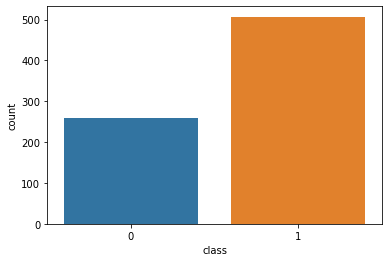

In [25]:
# checking for imbalance in the target data 'class' :
sns.countplot(x = 'class', data = y_train_df );

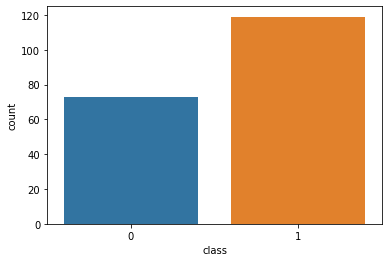

In [26]:
sns.countplot(x = 'class', data = y_test_df );

In [29]:
# creating a Sequential model : (we don't need to scale features as we dummified them)

from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(patience=5) 

model1 = keras.Sequential()

In [30]:
# Adding several layers:

model1.add(Dense(units = 8,input_dim = X_train.shape[1],activation='relu'))
model1.add(Dense(units = 4,activation='relu'))
model1.add(Dense(units = 2, activation='softmax')) 

In [31]:
# Compile the final network using adam :
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )


model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Creating the checkpoint and fitting the training dataset :
checkpoint_path = 'model1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [34]:
history1 = model1.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to model1.hdf5
62/62 - 1s - loss: 0.6867 - accuracy: 0.5425 - val_loss: 0.6646 - val_accuracy: 0.6623 - 968ms/epoch - 16ms/step
Epoch 2/60

Epoch 2: saving model to model1.hdf5
62/62 - 0s - loss: 0.6540 - accuracy: 0.6422 - val_loss: 0.6395 - val_accuracy: 0.6558 - 170ms/epoch - 3ms/step
Epoch 3/60

Epoch 3: saving model to model1.hdf5
62/62 - 0s - loss: 0.6326 - accuracy: 0.6634 - val_loss: 0.6253 - val_accuracy: 0.6558 - 218ms/epoch - 4ms/step
Epoch 4/60

Epoch 4: saving model to model1.hdf5
62/62 - 0s - loss: 0.6200 - accuracy: 0.6634 - val_loss: 0.6165 - val_accuracy: 0.6558 - 212ms/epoch - 3ms/step
Epoch 5/60

Epoch 5: saving model to model1.hdf5
62/62 - 1s - loss: 0.6106 - accuracy: 0.6634 - val_loss: 0.6112 - val_accuracy: 0.6558 - 672ms/epoch - 11ms/step
Epoch 6/60

Epoch 6: saving model to model1.hdf5
62/62 - 0s - loss: 0.6022 - accuracy: 0.6634 - val_loss: 0.6062 - val_accuracy: 0.6558 - 347ms/epoch - 6ms/step
Epoch 7/60

Epoch 7: saving mode

Epoch 52/60

Epoch 52: saving model to model1.hdf5
62/62 - 0s - loss: 0.2583 - accuracy: 0.9248 - val_loss: 0.2808 - val_accuracy: 0.9351 - 149ms/epoch - 2ms/step
Epoch 53/60

Epoch 53: saving model to model1.hdf5
62/62 - 0s - loss: 0.2550 - accuracy: 0.9281 - val_loss: 0.2775 - val_accuracy: 0.9416 - 156ms/epoch - 3ms/step
Epoch 54/60

Epoch 54: saving model to model1.hdf5
62/62 - 0s - loss: 0.2513 - accuracy: 0.9297 - val_loss: 0.2745 - val_accuracy: 0.9416 - 146ms/epoch - 2ms/step
Epoch 55/60

Epoch 55: saving model to model1.hdf5
62/62 - 0s - loss: 0.2480 - accuracy: 0.9314 - val_loss: 0.2696 - val_accuracy: 0.9416 - 146ms/epoch - 2ms/step
Epoch 56/60

Epoch 56: saving model to model1.hdf5
62/62 - 0s - loss: 0.2455 - accuracy: 0.9297 - val_loss: 0.2671 - val_accuracy: 0.9416 - 151ms/epoch - 2ms/step
Epoch 57/60

Epoch 57: saving model to model1.hdf5
62/62 - 0s - loss: 0.2414 - accuracy: 0.9297 - val_loss: 0.2612 - val_accuracy: 0.9416 - 149ms/epoch - 2ms/step
Epoch 58/60

Epoch 58:

In [35]:
# Evaluating your neural network model with the test data :
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [36]:
y_pred_train1 = model1.predict(X_train) 
y_pred_test1  = model1.predict(X_test)

y_pred_train1 = np.argmax(y_pred_train1, axis=1).reshape(-1,1)
y_pred_test1  = np.argmax(y_pred_test1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train1, y_test, y_pred_test1)

6/6 [==============================] - 0s 2ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.84
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       259
           1       0.91      0.99      0.95       507

    accuracy                           0.93       766
   macro avg       0.95      0.90      0.92       766
weighted avg       0.94      0.93      0.93       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.66
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        73
           1       0.83      0.96      0.89       119

    accuracy                           0.85       192
   macro avg       0.87      0.81      0.83       192
weighted avg       0.86      0.85      0.84       192



In [38]:
# Saving the model :
import pickle 
filename = "/Users/macbook/Documents/IronHack/Bootcamp/WEEK8/LAB/lab-deep-learning/tic-tac-toe.pickle"  
with open(filename, "wb") as file:
        pickle.dump(model1,file)

INFO:tensorflow:Assets written to: ram://8de6d450-d18c-42b0-8eef-0caea7c157db/assets


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [39]:
# Loading the saved model :
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!")

In [41]:
model1 = load("/Users/macbook/Documents/IronHack/Bootcamp/WEEK8/LAB/lab-deep-learning/tic-tac-toe.pickle") 
model1

In [51]:
# using it to make predictions on a few random rows in the test dataset
sample = pd.DataFrame(y_test.head(10))
sample

,class
676,0
765,0
253,1
871,0
558,1
767,0
232,1
53,1
140,1
822,0


In [53]:
X_test.head(10)

,TL,TM,TR,ML,MM,MR,BL,BM,BR
676,1,0,1,1,0,0,0,0,1
765,0,1,1,0,0,0,0,1,0
253,1,0,0,1,0,0,1,0,0
871,0,0,0,1,0,1,1,0,0
558,0,0,1,0,0,1,0,0,1
767,0,1,1,0,1,1,0,0,0
232,1,0,1,0,1,0,0,0,1
53,1,1,1,0,0,1,0,0,0
140,1,0,1,0,1,0,1,0,0
822,0,0,0,1,0,1,0,1,1


In [54]:
y_pred_sample  = model1.predict(X_test.head(10))

1/1 [==============================] - 0s 48ms/step


In [55]:
# Are the predictions correct ?
y_pred_sample == y_test.head(10)

676    False
765    False
253    False
871    False
558    False
767    False
232    False
53     False
140    False
822    False
Name: class, dtype: bool

In [ ]:
# The predictions are not correct...

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [58]:
# in order to test these changes, let's create a generic function !
# we will add a layer to the model

def create_cla_nn_model2(inputs,layer_list= [8,4,2],
                        activations = ['relu','relu','softmax'],
                        dropouts = [0.5,0,0]) :
                        #regularizers = [('l1',0.01),('l2',0.01)]):
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):
                model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ):
            model.add(Dense(1, activation=elem[1]))
                            #,activity_regularizer=
                            #regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

    model.summary()

    return model

In [59]:
model2 = create_cla_nn_model2(X_train.shape[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 80        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [60]:
checkpoint_path = 'model2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [61]:
history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to model2.hdf5
62/62 - 2s - loss: 0.7066 - accuracy: 0.5425 - val_loss: 0.6630 - val_accuracy: 0.5714 - 2s/epoch - 26ms/step
Epoch 2/60

Epoch 2: saving model to model2.hdf5
62/62 - 0s - loss: 0.6746 - accuracy: 0.6209 - val_loss: 0.6488 - val_accuracy: 0.6169 - 401ms/epoch - 6ms/step
Epoch 3/60

Epoch 3: saving model to model2.hdf5
62/62 - 1s - loss: 0.6663 - accuracy: 0.6275 - val_loss: 0.6380 - val_accuracy: 0.6234 - 509ms/epoch - 8ms/step
Epoch 4/60

Epoch 4: saving model to model2.hdf5
62/62 - 0s - loss: 0.6467 - accuracy: 0.6454 - val_loss: 0.6293 - val_accuracy: 0.6494 - 351ms/epoch - 6ms/step
Epoch 5/60

Epoch 5: saving model to model2.hdf5
62/62 - 0s - loss: 0.6513 - accuracy: 0.6471 - val_loss: 0.6226 - val_accuracy: 0.6494 - 404ms/epoch - 7ms/step
Epoch 6/60

Epoch 6: saving model to model2.hdf5
62/62 - 0s - loss: 0.6419 - accuracy: 0.6732 - val_loss: 0.6206 - val_accuracy: 0.6494 - 454ms/epoch - 7ms/step
Epoch 7/60

Epoch 7: saving model to

Epoch 52/60

Epoch 52: saving model to model2.hdf5
62/62 - 0s - loss: 0.5862 - accuracy: 0.6765 - val_loss: 0.5401 - val_accuracy: 0.6623 - 285ms/epoch - 5ms/step
Epoch 53/60

Epoch 53: saving model to model2.hdf5
62/62 - 0s - loss: 0.5778 - accuracy: 0.6732 - val_loss: 0.5383 - val_accuracy: 0.6623 - 249ms/epoch - 4ms/step
Epoch 54/60

Epoch 54: saving model to model2.hdf5
62/62 - 0s - loss: 0.5678 - accuracy: 0.6748 - val_loss: 0.5354 - val_accuracy: 0.6688 - 270ms/epoch - 4ms/step
Epoch 55/60

Epoch 55: saving model to model2.hdf5
62/62 - 0s - loss: 0.5670 - accuracy: 0.6781 - val_loss: 0.5339 - val_accuracy: 0.6688 - 238ms/epoch - 4ms/step
Epoch 56/60

Epoch 56: saving model to model2.hdf5
62/62 - 0s - loss: 0.5789 - accuracy: 0.6830 - val_loss: 0.5320 - val_accuracy: 0.6688 - 306ms/epoch - 5ms/step
Epoch 57/60

Epoch 57: saving model to model2.hdf5
62/62 - 0s - loss: 0.5720 - accuracy: 0.6895 - val_loss: 0.5315 - val_accuracy: 0.6623 - 305ms/epoch - 5ms/step
Epoch 58/60

Epoch 58:

In [62]:
y_pred_train2 = model2.predict(X_train) 
y_pred_test2  = model2.predict(X_test) 

y_pred_train2 = np.argmax(y_pred_train2, axis=1).reshape(-1,1)
y_pred_test2  = np.argmax(y_pred_test2, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train2, y_test, y_pred_test2)

6/6 [==============================] - 0s 7ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.07
              precision    recall  f1-score   support

           0       0.71      0.07      0.12       259
           1       0.67      0.99      0.80       507

    accuracy                           0.67       766
   macro avg       0.69      0.53      0.46       766
weighted avg       0.69      0.67      0.57       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.10
              precision    recall  f1-score   support

           0       0.78      0.10      0.17        73
           1       0.64      0.98      0.77       119

    accuracy                           0.65       192
   macro avg       0.71      0.54      0.47       192
weighted avg       0.69      0.65      0.55       192



Kappa is way worse, adding new layers doesn't have a positive impact on the model

In [65]:
# Trying with regularizers, updating the function accordingly :

def create_cla_nn_model3(inputs,layer_list= [8,4,2],
                        activations = ['relu','relu','softmax'],
                        #dropouts = [0.5,0,0],
                        regularizers = [('l1',0.01),('l2',0.01)]):
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            #if ( elem[2] != 0 ):
                #model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ):
            model.add(Dense(1, activation=elem[1]
                            ,activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

    model.summary()

    return model

In [66]:
model3 = create_cla_nn_model3(X_train.shape[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 80        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [67]:
checkpoint_path = 'model3.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [68]:
history3 = model3.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to model3.hdf5
62/62 - 1s - loss: 0.7303 - accuracy: 0.4395 - val_loss: 0.7365 - val_accuracy: 0.5195 - 1s/epoch - 19ms/step
Epoch 2/60

Epoch 2: saving model to model3.hdf5
62/62 - 0s - loss: 0.6950 - accuracy: 0.5033 - val_loss: 0.7045 - val_accuracy: 0.5974 - 436ms/epoch - 7ms/step
Epoch 3/60

Epoch 3: saving model to model3.hdf5
62/62 - 0s - loss: 0.6732 - accuracy: 0.6324 - val_loss: 0.6827 - val_accuracy: 0.6558 - 332ms/epoch - 5ms/step
Epoch 4/60

Epoch 4: saving model to model3.hdf5
62/62 - 0s - loss: 0.6596 - accuracy: 0.6634 - val_loss: 0.6691 - val_accuracy: 0.6558 - 388ms/epoch - 6ms/step
Epoch 5/60

Epoch 5: saving model to model3.hdf5
62/62 - 0s - loss: 0.6497 - accuracy: 0.6634 - val_loss: 0.6591 - val_accuracy: 0.6558 - 405ms/epoch - 7ms/step
Epoch 6/60

Epoch 6: saving model to model3.hdf5
62/62 - 0s - loss: 0.6432 - accuracy: 0.6634 - val_loss: 0.6511 - val_accuracy: 0.6558 - 348ms/epoch - 6ms/step
Epoch 7/60

Epoch 7: saving model to

Epoch 52/60

Epoch 52: saving model to model3.hdf5
62/62 - 0s - loss: 0.3450 - accuracy: 0.8856 - val_loss: 0.3246 - val_accuracy: 0.8831 - 219ms/epoch - 4ms/step
Epoch 53/60

Epoch 53: saving model to model3.hdf5
62/62 - 0s - loss: 0.3416 - accuracy: 0.8824 - val_loss: 0.3226 - val_accuracy: 0.8831 - 292ms/epoch - 5ms/step
Epoch 54/60

Epoch 54: saving model to model3.hdf5
62/62 - 0s - loss: 0.3371 - accuracy: 0.8889 - val_loss: 0.3206 - val_accuracy: 0.8896 - 307ms/epoch - 5ms/step
Epoch 55/60

Epoch 55: saving model to model3.hdf5
62/62 - 0s - loss: 0.3335 - accuracy: 0.8873 - val_loss: 0.3198 - val_accuracy: 0.8896 - 245ms/epoch - 4ms/step
Epoch 56/60

Epoch 56: saving model to model3.hdf5
62/62 - 0s - loss: 0.3307 - accuracy: 0.8856 - val_loss: 0.3148 - val_accuracy: 0.8831 - 225ms/epoch - 4ms/step
Epoch 57/60

Epoch 57: saving model to model3.hdf5
62/62 - 0s - loss: 0.3280 - accuracy: 0.8873 - val_loss: 0.3132 - val_accuracy: 0.8896 - 225ms/epoch - 4ms/step
Epoch 58/60

Epoch 58:

In [69]:
y_pred_train3 = model3.predict(X_train) 
y_pred_test3  = model3.predict(X_test) 

y_pred_train3 = np.argmax(y_pred_train3, axis=1).reshape(-1,1)
y_pred_test3  = np.argmax(y_pred_test3, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train3, y_test, y_pred_test3)

6/6 [==============================] - 0s 4ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.75
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       259
           1       0.87      0.99      0.93       507

    accuracy                           0.89       766
   macro avg       0.92      0.85      0.87       766
weighted avg       0.90      0.89      0.89       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.64
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        73
           1       0.81      0.97      0.88       119

    accuracy                           0.84       192
   macro avg       0.86      0.80      0.81       192
weighted avg       0.85      0.84      0.83       192



Kappa score is a bit worse than without regularizers. Let's try a combination of both dropout layer and regularizer :

In [70]:
def create_cla_nn_model4(inputs,layer_list= [8,4,2],
                        activations = ['relu','relu','softmax'],
                        dropouts = [0.5,0,0],
                        regularizers = [('l1',0.01),('l2',0.01)]):
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):
                model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ):
            model.add(Dense(1, activation=elem[1]
                            ,activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

    model.summary()

    return model

In [71]:
model4 = create_cla_nn_model4(X_train.shape[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 80        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [72]:
checkpoint_path = 'model4.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [73]:
history4 = model4.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to model4.hdf5
62/62 - 1s - loss: 0.6971 - accuracy: 0.5931 - val_loss: 0.6432 - val_accuracy: 0.5974 - 1s/epoch - 19ms/step
Epoch 2/60

Epoch 2: saving model to model4.hdf5
62/62 - 0s - loss: 0.6633 - accuracy: 0.6503 - val_loss: 0.6376 - val_accuracy: 0.6494 - 430ms/epoch - 7ms/step
Epoch 3/60

Epoch 3: saving model to model4.hdf5
62/62 - 0s - loss: 0.6542 - accuracy: 0.6601 - val_loss: 0.6363 - val_accuracy: 0.6558 - 378ms/epoch - 6ms/step
Epoch 4/60

Epoch 4: saving model to model4.hdf5
62/62 - 0s - loss: 0.6561 - accuracy: 0.6618 - val_loss: 0.6322 - val_accuracy: 0.6558 - 397ms/epoch - 6ms/step
Epoch 5/60

Epoch 5: saving model to model4.hdf5
62/62 - 0s - loss: 0.6411 - accuracy: 0.6569 - val_loss: 0.6317 - val_accuracy: 0.6558 - 402ms/epoch - 6ms/step
Epoch 6/60

Epoch 6: saving model to model4.hdf5
62/62 - 0s - loss: 0.6445 - accuracy: 0.6520 - val_loss: 0.6311 - val_accuracy: 0.6558 - 425ms/epoch - 7ms/step
Epoch 7/60

Epoch 7: saving model to

Epoch 52/60

Epoch 52: saving model to model4.hdf5
62/62 - 0s - loss: 0.5375 - accuracy: 0.7353 - val_loss: 0.4531 - val_accuracy: 0.8247 - 343ms/epoch - 6ms/step
Epoch 53/60

Epoch 53: saving model to model4.hdf5
62/62 - 0s - loss: 0.5387 - accuracy: 0.7337 - val_loss: 0.4474 - val_accuracy: 0.8377 - 270ms/epoch - 4ms/step
Epoch 54/60

Epoch 54: saving model to model4.hdf5
62/62 - 0s - loss: 0.5226 - accuracy: 0.7549 - val_loss: 0.4468 - val_accuracy: 0.8312 - 237ms/epoch - 4ms/step
Epoch 55/60

Epoch 55: saving model to model4.hdf5
62/62 - 0s - loss: 0.5278 - accuracy: 0.7418 - val_loss: 0.4425 - val_accuracy: 0.8377 - 247ms/epoch - 4ms/step
Epoch 56/60

Epoch 56: saving model to model4.hdf5
62/62 - 0s - loss: 0.5214 - accuracy: 0.7565 - val_loss: 0.4420 - val_accuracy: 0.8377 - 334ms/epoch - 5ms/step
Epoch 57/60

Epoch 57: saving model to model4.hdf5
62/62 - 0s - loss: 0.5253 - accuracy: 0.7484 - val_loss: 0.4416 - val_accuracy: 0.8247 - 244ms/epoch - 4ms/step
Epoch 58/60

Epoch 58:

In [74]:
y_pred_train4 = model4.predict(X_train) 
y_pred_test4  = model4.predict(X_test) 

y_pred_train4 = np.argmax(y_pred_train4, axis=1).reshape(-1,1)
y_pred_test4  = np.argmax(y_pred_test4, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train4, y_test, y_pred_test4)

6/6 [==============================] - 0s 17ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.51
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       259
           1       0.78      0.99      0.87       507

    accuracy                           0.81       766
   macro avg       0.87      0.72      0.75       766
weighted avg       0.84      0.81      0.79       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.40
              precision    recall  f1-score   support

           0       0.90      0.38      0.54        73
           1       0.72      0.97      0.83       119

    accuracy                           0.75       192
   macro avg       0.81      0.68      0.68       192
weighted avg       0.79      0.75      0.72       192



Not better...

In [76]:
# Adjusting the learning rate :

def create_cla_nn_model5(inputs,layer_list= [8,4,2],
                        activations = ['relu','relu','softmax']) :
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ):
            model.add(Dense(1, activation=elem[1]))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

    model.summary()

    return model

In [77]:
model5 = create_cla_nn_model5(X_train.shape[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 80        
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [78]:
checkpoint_path = 'model5.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [79]:
history5 = model5.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to model5.hdf5
62/62 - 2s - loss: 0.6418 - accuracy: 0.6585 - val_loss: 0.5987 - val_accuracy: 0.6948 - 2s/epoch - 27ms/step
Epoch 2/60

Epoch 2: saving model to model5.hdf5
62/62 - 0s - loss: 0.5616 - accuracy: 0.7010 - val_loss: 0.4842 - val_accuracy: 0.7597 - 369ms/epoch - 6ms/step
Epoch 3/60

Epoch 3: saving model to model5.hdf5
62/62 - 0s - loss: 0.5139 - accuracy: 0.7631 - val_loss: 0.4357 - val_accuracy: 0.8182 - 358ms/epoch - 6ms/step
Epoch 4/60

Epoch 4: saving model to model5.hdf5
62/62 - 0s - loss: 0.4745 - accuracy: 0.7745 - val_loss: 0.4227 - val_accuracy: 0.8182 - 390ms/epoch - 6ms/step
Epoch 5/60

Epoch 5: saving model to model5.hdf5
62/62 - 0s - loss: 0.4565 - accuracy: 0.7990 - val_loss: 0.3896 - val_accuracy: 0.8377 - 391ms/epoch - 6ms/step
Epoch 6/60

Epoch 6: saving model to model5.hdf5
62/62 - 0s - loss: 0.4118 - accuracy: 0.8170 - val_loss: 0.3719 - val_accuracy: 0.8636 - 277ms/epoch - 4ms/step
Epoch 7/60

Epoch 7: saving model to

In [80]:
y_pred_train5 = model5.predict(X_train) 
y_pred_test5  = model5.predict(X_test) 

y_pred_train5 = np.argmax(y_pred_train5, axis=1).reshape(-1,1)
y_pred_test5  = np.argmax(y_pred_test5, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train5, y_test, y_pred_test5)

6/6 [==============================] - 0s 6ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.94
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       259
           1       0.96      1.00      0.98       507

    accuracy                           0.97       766
   macro avg       0.98      0.96      0.97       766
weighted avg       0.97      0.97      0.97       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.87
              precision    recall  f1-score   support

           0       0.96      0.88      0.91        73
           1       0.93      0.97      0.95       119

    accuracy                           0.94       192
   macro avg       0.94      0.93      0.93       192
weighted avg       0.94      0.94      0.94       192



It seems that modifying the learning rate has a positive impact on our model. We get a kappa score on the test set of 0.87 (> 0.66 with the basic model)

In [81]:
# Increasing the number of epochs while fitting the training data : (and keeping the previous learning rate)
history6 = model5.fit(
    X_train, 
    y_train, 
    epochs=80, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/80

Epoch 1: saving model to model5.hdf5
62/62 - 0s - loss: 0.1199 - accuracy: 0.9542 - val_loss: 0.1157 - val_accuracy: 0.9675 - 376ms/epoch - 6ms/step
Epoch 2/80

Epoch 2: saving model to model5.hdf5
62/62 - 0s - loss: 0.1088 - accuracy: 0.9673 - val_loss: 0.1203 - val_accuracy: 0.9675 - 342ms/epoch - 6ms/step
Epoch 3/80

Epoch 3: saving model to model5.hdf5
62/62 - 0s - loss: 0.0926 - accuracy: 0.9771 - val_loss: 0.1756 - val_accuracy: 0.9286 - 312ms/epoch - 5ms/step
Epoch 4/80

Epoch 4: saving model to model5.hdf5
62/62 - 0s - loss: 0.1095 - accuracy: 0.9624 - val_loss: 0.1283 - val_accuracy: 0.9675 - 490ms/epoch - 8ms/step
Epoch 5/80

Epoch 5: saving model to model5.hdf5
62/62 - 0s - loss: 0.0941 - accuracy: 0.9706 - val_loss: 0.1443 - val_accuracy: 0.9351 - 229ms/epoch - 4ms/step
Epoch 6/80

Epoch 6: saving model to model5.hdf5
62/62 - 0s - loss: 0.1087 - accuracy: 0.9624 - val_loss: 0.2293 - val_accuracy: 0.9156 - 324ms/epoch - 5ms/step


In [82]:
y_pred_train6 = model5.predict(X_train) 
y_pred_test6  = model5.predict(X_test) 

y_pred_train6 = np.argmax(y_pred_train6, axis=1).reshape(-1,1)
y_pred_test6  = np.argmax(y_pred_test6, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train6, y_test, y_pred_test6)

6/6 [==============================] - 0s 17ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.88
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       259
           1       0.97      0.94      0.96       507

    accuracy                           0.94       766
   macro avg       0.93      0.94      0.94       766
weighted avg       0.95      0.94      0.94       766

Results obtained for the TEST SET
The Cohen's Kappa is: 0.80
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        73
           1       0.93      0.92      0.92       119

    accuracy                           0.91       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.91      0.91      0.91       192



We get a lower performance : the glass ceiling of number of epochs may be reached !

**Which approach(es) did you find helpful to improve your model performance?**

The best approach have been to increase the learning rate from 0.001 (default value) to 0.01 !